In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib
from distutils.version import LooseVersion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

C:\Users\xinzang\AppData\Local\Temp\ipykernel_19620\1944609482.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100,
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100,
                        label='test set')

In [4]:
def bestCofLR(X,y):
    log_reg = LogisticRegression()

    # 定义要尝试的 C 值
    param_grid = {'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100]}

    # 使用 Grid Search 进行参数搜索
    grid_search = GridSearchCV(log_reg, param_grid, cv=3)
    grid_search.fit(X, y)

    # 输出最佳的 C 值
    best_C = grid_search.best_params_['C']
    print("Best C value:", best_C)
    return grid_search.best_estimator_

In [5]:
def bestGammaofSVM(X,y):
    # 定义支持向量机模型
    svm = SVC()

    # 定义要尝试的 gamma 值
    param_grid = {
    'kernel': ['rbf'],
    'gamma': [0.001, 0.01, 0.1]
}

    # 使用 Grid Search 进行参数搜索
    grid_search = GridSearchCV(svm, param_grid, cv=3)
    grid_search.fit(X, y)

    # 输出最佳的 param 值
    best_gamma = grid_search.best_params_
    print("Best param value:", best_gamma)
    return grid_search.best_estimator_

In [6]:
def bestDepthofDT(X,y):
    # 定义决策树模型
    tree = DecisionTreeClassifier()

    # 定义要尝试的树的深度值
    param_grid = {'max_depth': [1, 2, 3, 4, 5, 6]}

    # 使用 Grid Search 进行参数搜索
    grid_search = GridSearchCV(tree, param_grid, cv=5)
    grid_search.fit(X, y)

    # 输出最佳的树的深度值
    best_depth = grid_search.best_params_['max_depth']
    print("Best tree depth:", best_depth)
    return grid_search.best_estimator_

In [7]:
df = pd.read_csv(r'./Kaggle-Give-Me-Some-Data/cs-training.csv')
train_df = pd.read_csv(r"./Kaggle-Give-Me-Some-Data/cs-training.csv")
test_df = pd.read_csv(r"./Kaggle-Give-Me-Some-Data/cs-test.csv")




In [8]:
train_df = train_df.drop(columns = ['Unnamed: 0'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [9]:
test_df=test_df.drop(columns = ['Unnamed: 0'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

In [12]:
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(train_df.mean(), inplace=True)

In [13]:
y_train = train_df['SeriousDlqin2yrs'].to_numpy()
X_train = train_df.drop(['SeriousDlqin2yrs'], axis=1)

In [14]:
y_test = test_df['SeriousDlqin2yrs'].to_numpy()
X_test = test_df.drop(['SeriousDlqin2yrs'], axis=1)

In [15]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)


In [16]:
X_train_std

array([[-0.02115001, -0.49385982,  0.37659296, ...,  4.40954554,
        -0.05785249,  1.12938692],
       [-0.02038516, -0.83234222, -0.10041896, ..., -0.90128301,
        -0.05785249,  0.22062674],
       [-0.02158222, -0.96773518,  0.138087  , ..., -0.90128301,
        -0.05785249, -0.68813345],
       ...,
       [-0.02323239,  0.38619443, -0.10041896, ..., -0.01614492,
        -0.05785249, -0.68813345],
       [-0.02421753, -1.50930703, -0.10041896, ..., -0.90128301,
        -0.05785249, -0.68813345],
       [-0.02081306,  0.79237332, -0.10041896, ...,  0.86899317,
        -0.05785249, -0.68813345]])

In [17]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=42,
                            solver='lbfgs',
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10.**c)



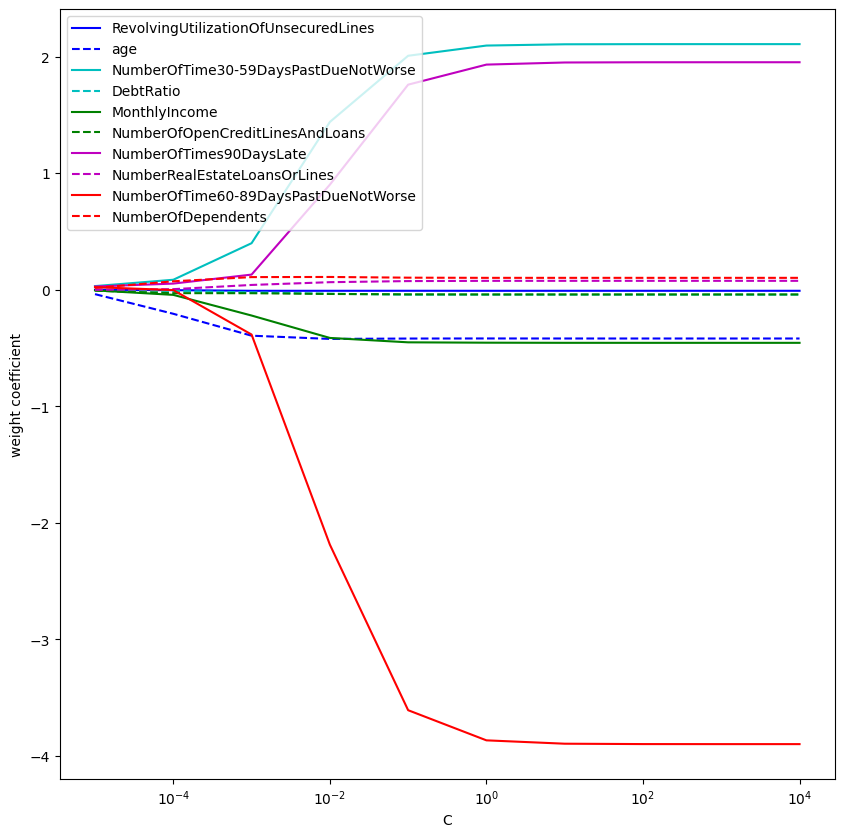

In [19]:
weights = np.array(weights)
plt.figure(figsize=(10, 10))
plt.plot(params, weights[:, 0],color='b',
         label='RevolvingUtilizationOfUnsecuredLines')
plt.plot(params, weights[:, 1], linestyle='--',color='b',
         label='age')
plt.plot(params, weights[:, 2], color='c',
         label='NumberOfTime30-59DaysPastDueNotWorse')
plt.plot(params, weights[:, 3], linestyle='--', color='c',
         label='DebtRatio')
plt.plot(params, weights[:, 4], color='g',
         label='MonthlyIncome')
plt.plot(params, weights[:, 5], linestyle='--', color='g',
         label='NumberOfOpenCreditLinesAndLoans')
plt.plot(params, weights[:, 6], color='m',
         label='NumberOfTimes90DaysLate')
plt.plot(params, weights[:, 7], linestyle='--',color='m',
         label='NumberRealEstateLoansOrLines')
plt.plot(params, weights[:, 8], color='r',
         label='NumberOfTime60-89DaysPastDueNotWorse')
plt.plot(params, weights[:, 9], linestyle='--',color='r',
         label='NumberOfDependents')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

In [20]:
X_new= SelectFromModel(LogisticRegression(penalty="l1", C=0.1,solver='liblinear'),max_features=2).fit_transform(X_train_std, y_train)

In [21]:
X_new

array([[ 0.37659296, -0.05785249],
       [-0.10041896, -0.05785249],
       [ 0.138087  , -0.05785249],
       ...,
       [-0.10041896, -0.05785249],
       [-0.10041896, -0.05785249],
       [-0.10041896, -0.05785249]])

In [22]:
# 此处在c为0.1时 降维选择了NumberOfTime30-59DaysPastDueNotWorse、NumberOfTime60-89DaysPastDueNotWorse  
X_train_std[:,[2,8]]

array([[ 0.37659296, -0.05785249],
       [-0.10041896, -0.05785249],
       [ 0.138087  , -0.05785249],
       ...,
       [-0.10041896, -0.05785249],
       [-0.10041896, -0.05785249],
       [-0.10041896, -0.05785249]])

In [29]:
# 根据前面的图像选择大概在c为0.001时 降维选择了age、NumberOfTime30-59DaysPastDueNotWorse、
X_new = X_train_std[:,[1, 2]]
X_new

array([[-0.49385982,  0.37659296],
       [-0.83234222, -0.10041896],
       [-0.96773518,  0.138087  ],
       ...,
       [ 0.38619443, -0.10041896],
       [-1.50930703, -0.10041896],
       [ 0.79237332, -0.10041896]])

In [24]:
LR=bestCofLR(X_new,y_train)
# SVM=bestGammaofSVM(X_new,y_train)
DT=bestDepthofDT(X_new,y_train)



Best C value: 0.001
Best tree depth: 6


In [22]:
svm = SVC(kernel = 'rbf', gamma = 0.001)

# 定义要尝试的 gamma 值
param_grid = {
'gamma': [0.001, 0.01, 0.1]
}

svm = svm.fit(X_new, y_train)


In [25]:
svm.score(X_new, y_train)

0.9333266666666666

In [26]:
svm1 = SVC(kernel = 'rbf', gamma = 0.01)
svm1 = svm1.fit(X_new, y_train)

In [27]:
svm1.score(X_new, y_train)

0.9333266666666666

C:\Users\xinzang\AppData\Local\Temp\ipykernel_19620\4243855650.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


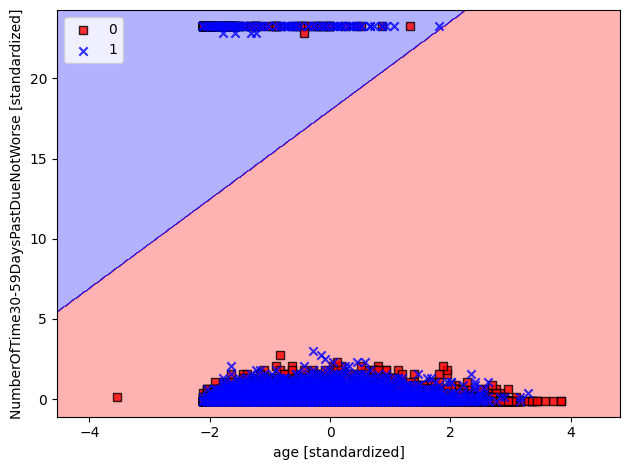

In [25]:
plot_decision_regions(X=X_new, y=y_train,classifier=LR)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()


In [28]:
SVM = svm1

In [ ]:
plot_decision_regions(X=X_new, y=y_train,classifier=SVM)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()


C:\Users\xinzang\AppData\Local\Temp\ipykernel_19620\4243855650.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


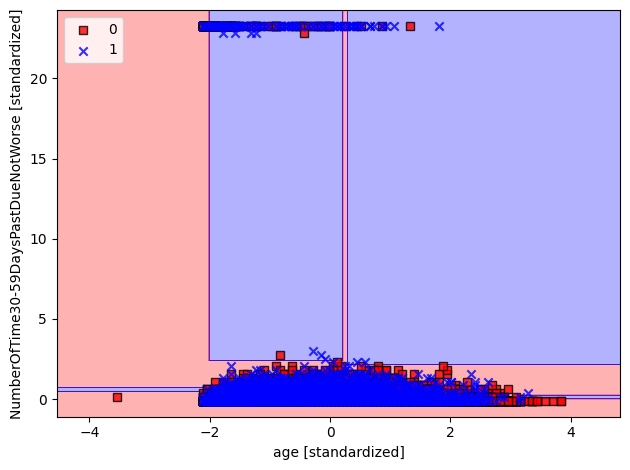

In [26]:
plot_decision_regions(X=X_new, y=y_train,classifier=DT)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()

<Axes: >

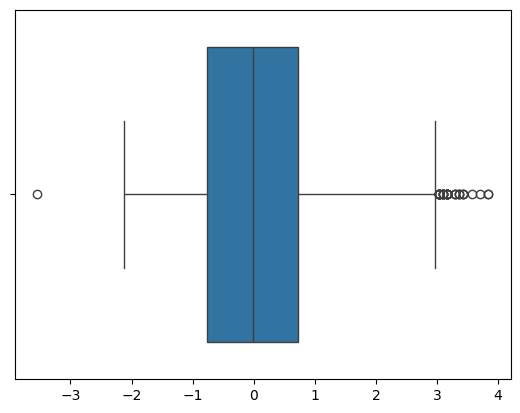

In [30]:
# 考虑到出现了极端值影响了可视化，选择删除其中的部分数据。
import seaborn as sns
sns.boxplot(x=X_new[:,0])

<Axes: >

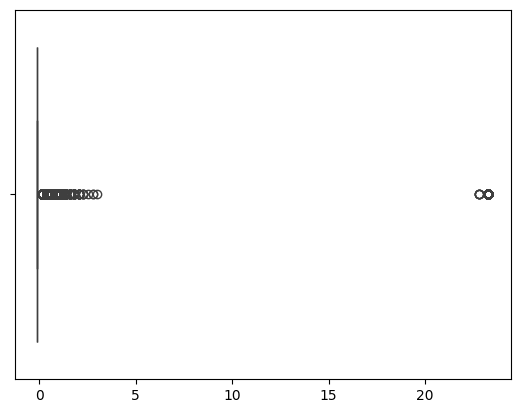

In [31]:
sns.boxplot(x=X_new[:,1])

In [32]:
y_train = y_train[X_new[:,1] <= 20]

In [33]:
X_new = X_new[X_new[:,1] <= 20]

In [34]:
X_new

array([[-0.49385982,  0.37659296],
       [-0.83234222, -0.10041896],
       [-0.96773518,  0.138087  ],
       ...,
       [ 0.38619443, -0.10041896],
       [-1.50930703, -0.10041896],
       [ 0.79237332, -0.10041896]])

<Axes: >

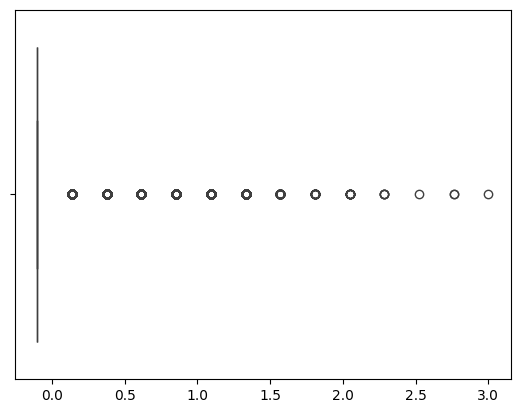

In [35]:
sns.boxplot(x=X_new[:,1])

In [36]:
LR=bestCofLR(X_new,y_train)
# SVM=bestGammaofSVM(X_new,y_train)
DT=bestDepthofDT(X_new,y_train)

Best C value: 0.0001
Best tree depth: 5


In [37]:
svm = SVC(kernel = 'rbf', gamma = 0.001)

# 定义要尝试的 gamma 值
param_grid = {
'gamma': [0.001, 0.01, 0.1]
}

svm = svm.fit(X_new, y_train)


In [38]:
svm.score(X_new, y_train)

0.9340216788774536

In [39]:
svm1 = SVC(kernel = 'rbf', gamma = 0.01)
svm1 = svm1.fit(X_new, y_train)

In [40]:
svm1.score(X_new, y_train)

0.9340216788774536

C:\Users\xinzang\AppData\Local\Temp\ipykernel_19620\4243855650.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


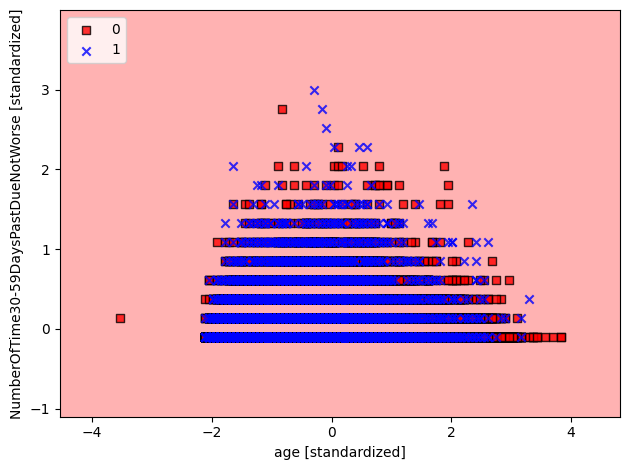

In [41]:
plot_decision_regions(X=X_new, y=y_train,classifier=LR)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()


In [42]:
SVM = svm1

C:\Users\xinzang\AppData\Local\Temp\ipykernel_19620\4243855650.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


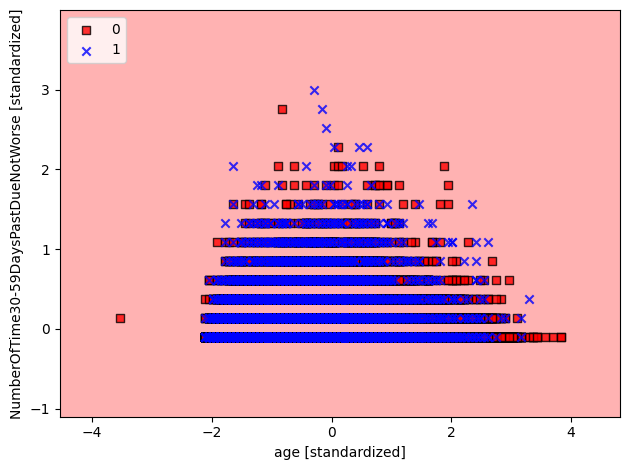

In [43]:
plot_decision_regions(X=X_new, y=y_train,classifier=SVM)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()

C:\Users\xinzang\AppData\Local\Temp\ipykernel_19620\4243855650.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


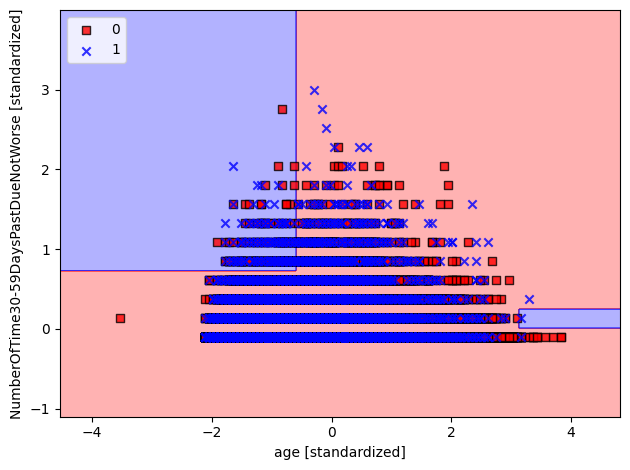

In [44]:
plot_decision_regions(X=X_new, y=y_train,classifier=DT)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()